In [4]:
pip install pandas openpyxl

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 9.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 9.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 9.6 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.5 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----

In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Resultados experimentales sobre LLMs y la aplicabilidad en el patrón factory method

## Tabla de resultados experimentales de la tasa de éxito en el patrón factory method

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar los datos desde el archivo Excel
file_path = "resultados.xlsx"  # Cambia esto por la ruta de tu archivo Excel
tabla1 = pd.read_excel(file_path)

# 2. Agrupar por Modelo y calcular promedios, desviaciones estándar y otros valores
grouped = tabla1.groupby('LLMs').agg({
    'Porcentaje de éxito': ['mean', 'std'],  # Calcula promedio y desviación estándar
    'Tiempo de respuesta': ['mean', 'std']  # Calcula promedio y desviación estándar del tiempo
})

# 3. Aplanar las columnas después del agrupamiento
grouped.columns = [
    'Promedio_exito', 
    'Desviacion_estandar_exito', 
    'Promedio_tiempo', 
    'Desviacion_estandar_tiempo'
]
grouped = grouped.reset_index()



# 4. Definir el tamaño de la muestra
n = 24  # 8 experimentos * 3 intentos por modelo

# 5. Calcular límites del intervalo de confianza para cada modelo
grouped['IC_Inferior'] = grouped['Promedio_exito'] - (1.96 * grouped['Desviacion_estandar_exito'] / np.sqrt(n))
grouped['IC_Superior'] = grouped['Promedio_exito'] + (1.96 * grouped['Desviacion_estandar_exito'] / np.sqrt(n))

# 6. Calcular las barras de error (la distancia entre Promedio y los IC)
grouped['Error_bar'] = grouped['IC_Superior'] - grouped['Promedio_exito']

# 8. Calcular el promedio global del tiempo de respuesta
promedio_global_tiempo = grouped['Promedio_tiempo'].mean()

# 9. Calcular la desviación estándar del promedio del tiempo de respuesta
desviacion_estandar_promedio_tiempo = grouped['Promedio_tiempo'].std()

# 7. Crear la tabla final
tabla_final = grouped[['LLMs', 
                       'Promedio_exito', 
                       'Desviacion_estandar_exito', 
                       'IC_Inferior', 'IC_Superior', 
                       'Error_bar', 
                       'Promedio_tiempo', 
                       'Desviacion_estandar_tiempo']]

# Exportar la tabla a Excel
output_file = "tabla_final_con_barras_de_error.xlsx"
tabla_final.to_excel(output_file, index=False)

# 10. Mostrar el valor de la desviación estándar del promedio del tiempo de respuesta
print(f"Desviación estándar del promedio total del tiempo de respuesta: {desviacion_estandar_promedio_tiempo:.2f}")


print(tabla_final)

Desviación estándar del promedio total del tiempo de respuesta: 23.92
              LLMs  Promedio_exito  Desviacion_estandar_exito  IC_Inferior  \
0       Claude 3.5         0.77780                   0.192431     0.700812   
1      DeepSeek R1         0.83335                   0.182556     0.760312   
2  GPT4 o1 preview         0.88890                   0.192431     0.811912   
3       Gemini 2.0         0.77780                   0.192431     0.700812   

   IC_Superior  Error_bar  Promedio_tiempo  Desviacion_estandar_tiempo  
0     0.854788   0.076988              NaN                         NaN  
1     0.906388   0.073038        43.166667                   33.606051  
2     0.965888   0.076988              NaN                         NaN  
3     0.854788   0.076988         9.333333                    4.517374  


### Gráfico sobre la tasa de éxito en el patrón factory method

Probando usar gráfico y % , X para LLMs

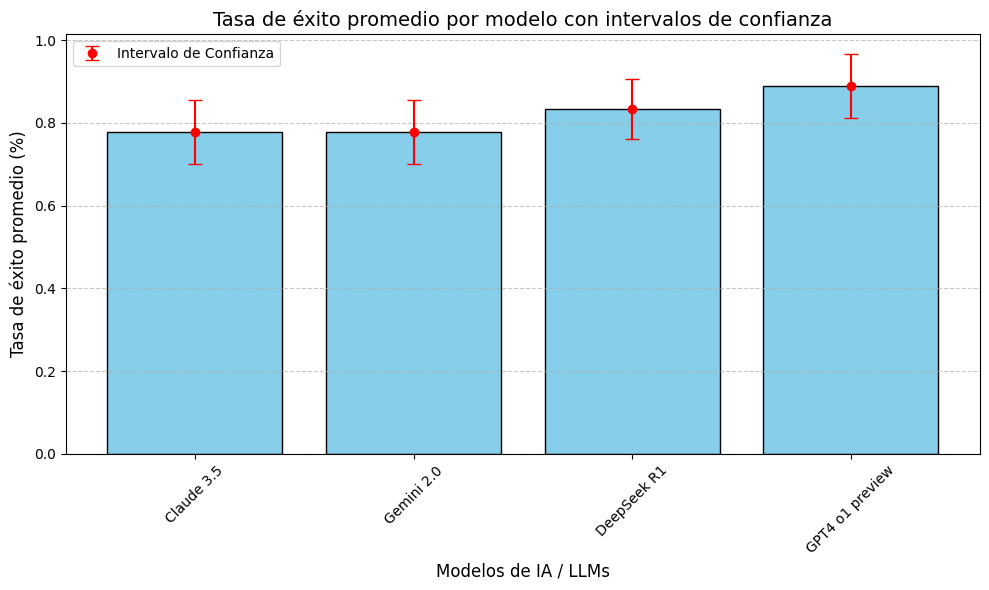

In [17]:
# 8. Ordenar los datos por Promedio_exito de menor a mayor
grouped_sorted = tabla_final.sort_values(by='Promedio_exito', ascending=True)

# 9. Crear el gráfico de barras verticales con intervalos de confianza
plt.figure(figsize=(10, 6))

# Barras principales (promedio de éxito)
bars = plt.bar(grouped_sorted['LLMs'], grouped_sorted['Promedio_exito'], color='skyblue', edgecolor='black')

# Agregar líneas de error (intervalo de confianza)
plt.errorbar(
    x=grouped_sorted['LLMs'],  # Los nombres de los modelos en el eje X
    y=grouped_sorted['Promedio_exito'],  # Los valores de éxito promedio en el eje Y
    yerr=grouped_sorted['Error_bar'],  # Barras de error en el eje Y
    fmt='o', color='red', capsize=5, label='Intervalo de Confianza'
)

# Etiquetas y título
plt.xlabel('Modelos de IA / LLMs', fontsize=12)
plt.ylabel('Tasa de éxito promedio (%)', fontsize=12)
plt.title('Tasa de éxito promedio por modelo con intervalos de confianza', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si son largas
plt.ylim(0, 100)  # Límite superior del eje Y
plt.legend()
plt.tight_layout()
plt.show()

## Tabla de la tasa de éxito del patrón observer

### Gráfico sobre LLMs y la aplicabilidad en el patrón observer

## Tabla de la tasa de éxito del patrón strategy

### Gráfico sobre LLMs y la aplicabilidad en el patrón strategy

## Resultados experimentales sobre la aplicabilidad en los patrones de diseño

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Función para procesar una tabla individual
def procesar_tabla(df):
    """
    Procesa una tabla individual para calcular estadísticas:
    - Tasa de éxito promedio
    - Desviación estándar del éxito
    - Intervalo de confianza del 95%
    - Tiempo de respuesta promedio
    - Desviación estándar del tiempo de respuesta
    """
    # Calcular estadísticas
    tasa_exito = df["Porcentaje de éxito"].mean()
    desviacion_estandar = df["Porcentaje de éxito"].std()
    tiempo_respuesta = df["Tiempo de respuesta"].mean()
    desviacion_estandar_tiempo = df["Tiempo de respuesta"].std()  # Nueva estadística

    # Calcular intervalo de confianza del 95%
    n = len(df)  # Número de observaciones
    z = 1.96  # Valor para IC 95%
    error_estandar = desviacion_estandar / np.sqrt(n)
    ic_inferior = tasa_exito - z * error_estandar
    ic_superior = tasa_exito + z * error_estandar

    return {
        "Tasa de éxito": tasa_exito,
        "Desviación estándar (éxito)": desviacion_estandar,
        "IC Inferior": ic_inferior,
        "IC Superior": ic_superior,
        "Barra de error": z * error_estandar,  # Longitud de la barra de error
        "Tiempo de Respuesta": tiempo_respuesta,
        "Desviación estándar (tiempo de respuesta)": desviacion_estandar_tiempo  # Nueva columna
    }

# 2. Cargar las tres hojas desde un archivo Excel
file_path = "resultados.xlsx"  # Cambia esto por la ruta de tu archivo Excel

# Leer cada hoja del archivo Excel
factory_df = pd.read_excel(file_path, sheet_name="No_experimentos")
observer_df = pd.read_excel(file_path, sheet_name="No_experimentos-o")
strategy_df = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Convertir columnas numéricas a float
for df in [factory_df, observer_df, strategy_df]:
    df["Porcentaje de éxito"] = df["Porcentaje de éxito"].astype(float)
    df["Tiempo de respuesta"] = df["Tiempo de respuesta"].fillna(0).astype(float)  # Rellenar NaN con 0

# 3. Procesar cada tabla
factory_stats = procesar_tabla(factory_df)
observer_stats = procesar_tabla(observer_df)
strategy_stats = procesar_tabla(strategy_df)

# Crear una lista de diccionarios para los patrones
patrones = [
    {"Patrón": "Factory Method", **factory_stats},
    {"Patrón": "Observer", **observer_stats},
    {"Patrón": "Strategy", **strategy_stats}
]

# Convertir la lista de diccionarios en un DataFrame
tabla_final_patrones = pd.DataFrame(patrones)  # Renombrada la variable

# Reemplazar NaN con valores vacíos o 0 según corresponda
tabla_final_patrones = tabla_final_patrones.fillna({
    "Tasa de éxito": 0, 
    "Desviación estándar (éxito)": 0, 
    "IC Inferior": 0, 
    "IC Superior": 0, 
    "Barra de error": 0, 
    "Tiempo de Respuesta": 0,
    "Desviación estándar (tiempo)": 0  # Manejar NaN para la nueva columna
})

# Exportar la tabla a Excel
output_file = "tabla_final_patrones_diseño_final.xlsx"
tabla_final_patrones.to_excel(output_file, index=False)  # Actualizada la variable aquí también

print(tabla_final_patrones)  # Actualizada la variable aquí también

           Patrón  Tasa de éxito  Desviación estándar (éxito)  IC Inferior  \
0  Factory Method       0.931631                     0.136344     0.902473   
1        Observer       0.703728                     0.225462     0.651649   
2        Strategy       0.844460                     0.172115     0.804703   

   IC Superior  Barra de error  Tiempo de Respuesta  \
0     0.960788        0.029158            10.348810   
1     0.755807        0.052079             9.948611   
2     0.884217        0.039757             9.725000   

   Desviación estándar (tiempo de respuesta)  
0                                  18.865385  
1                                  19.141077  
2                                  15.266374  


### Gráfico de barras para agrupar los patrones

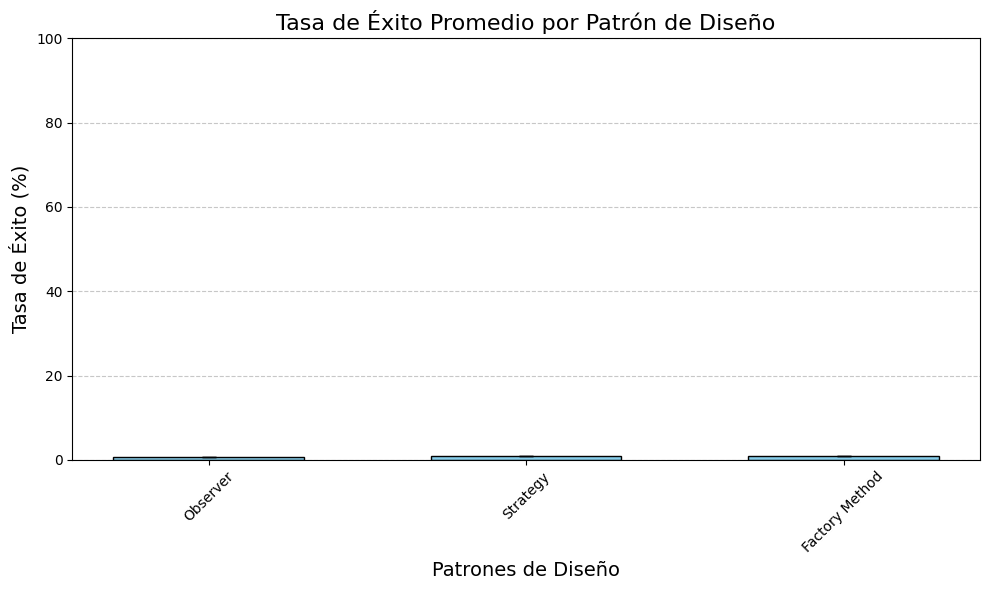

In [2]:
# Ordenar los datos por Tasa de éxito de menor a mayor
tabla_final_sorted = tabla_final_patrones.sort_values(by="Tasa de éxito", ascending=True)

# Gráfico de barras con barras de error
plt.figure(figsize=(10, 6))

# Datos para el gráfico
patrones_nombres = tabla_final_sorted["Patrón"]
tasa_exito = tabla_final_sorted["Tasa de éxito"]
error_bars = tabla_final_sorted["Barra de error"]

# Posiciones en el eje X
x = np.arange(len(patrones_nombres))
bar_width = 0.6

plt.bar(x, tasa_exito, yerr=error_bars, capsize=5, color="skyblue", edgecolor="black", width=bar_width)

# Personalizar el gráfico
plt.title("Tasa de Éxito Promedio por Patrón de Diseño", fontsize=16)
plt.xlabel("Patrones de Diseño", fontsize=14)
plt.ylabel("Tasa de Éxito (%)", fontsize=14)
plt.xticks(x, patrones_nombres, rotation=45)  # Usar los nombres ordenados
plt.ylim(0, 100)  # Límite superior del eje Y
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Gráfico de boxplot para el promedio de tiempo de respuesta

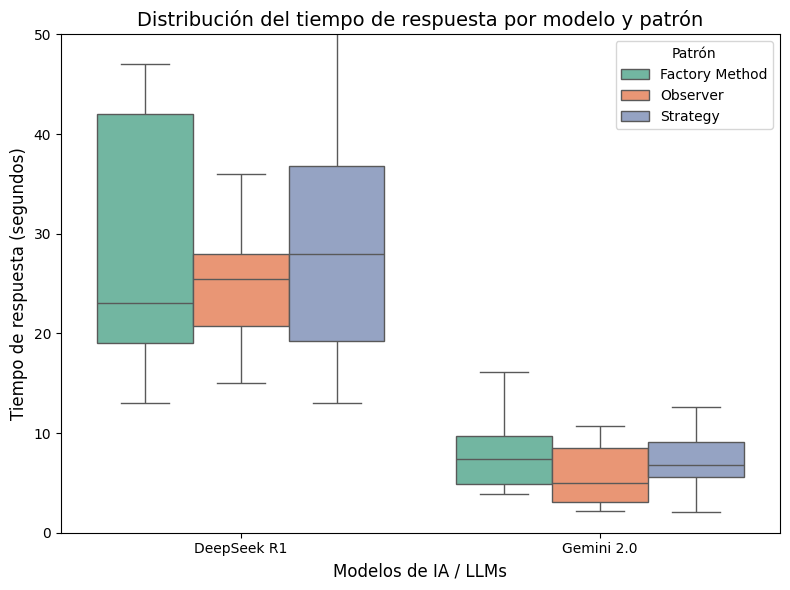

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos desde el archivo Excel
file_path = "resultados.xlsx"  # Cambia esto por la ruta de tu archivo Excel

# Leer cada hoja correspondiente a los patrones
# Leer cada hoja del archivo Excel
patron_1 = pd.read_excel(file_path, sheet_name="No_experimentos")
patron_2 = pd.read_excel(file_path, sheet_name="No_experimentos-o")
patron_3 = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Añadir una columna para identificar el patrón
patron_1['Patron'] = "Factory Method"
patron_2['Patron'] = "Observer"
patron_3['Patron'] = "Strategy"

# Combinar todos los datos en una sola tabla
tabla_completa = pd.concat([patron_1, patron_2, patron_3], ignore_index=True)

# 2. Filtrar los datos para incluir solo los modelos Deepseek r1 y Gemini 2.0
modelos_seleccionados = ['DeepSeek R1', 'Gemini 2.0']
datos_filtrados = tabla_completa[tabla_completa['LLMs'].isin(modelos_seleccionados)]

# 3. Crear la tabla final consolidada
tabla_final = datos_filtrados.groupby(['LLMs', 'Patron']).agg({
    'Tiempo de respuesta': ['mean', 'std'],  # Promedio y desviación estándar del tiempo
}).reset_index()

# Aplanar las columnas después del agrupamiento
tabla_final.columns = ['LLMs', 'Patron', 'Tiempo_promedio', 'Tiempo_std']

## No es necesario crear tabla porque ya está la anterior sobre los 3 patrones

# 4. Crear el gráfico de boxplot
plt.figure(figsize=(8, 6))

# Boxplot con Tiempo de respuesta en el eje Y
sns.boxplot(
    x='LLMs',
    y='Tiempo de respuesta',
    hue='Patron',  # Separar por patrón dentro de cada modelo
    data=datos_filtrados,
    palette='Set2'
)

# Ajustar el eje Y para que vaya hasta 60 segundos
plt.ylim(0, 50)  # Límites del eje Y: desde 0 hasta 60

# Etiquetas y título
plt.xlabel('Modelos de IA / LLMs', fontsize=12)
plt.ylabel('Tiempo de respuesta (segundos)', fontsize=12)
plt.title('Distribución del tiempo de respuesta por modelo y patrón', fontsize=14)

# Ajustar leyenda
plt.legend(title='Patrón', loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Para graficar boxplot con la desviación estándar del promedio de tiempo de respuesta